# **Импорт необходимых библиотек и методов**

In [ ]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# для обработки данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# для обучения модели

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score , precision_score , recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# **Загрузка датасета**

In [ ]:
import pandas as pd

dataset_path = 'US_Election_dataset_v1.csv'
df = pd.read_csv(dataset_path)

df

,Unnamed: 0,county,state,2020 Democrat vote raw,2020 Democrat vote %,2020 Republican vote raw,2020 Republican vote %,2020 other vote raw,2020 other vote %,Population with less than 9th grade education,...,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation
0,"Autauga County, Alabama",Autauga County,Alabama,7503,27.02,19838,71.44,429,1.54,1.70%,...,0.31,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36
1,"Baldwin County, Alabama",Baldwin County,Alabama,24578,22.41,83544,76.17,1557,1.42,2.00%,...,0.56,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13
2,"Barbour County, Alabama",Barbour County,Alabama,4816,45.79,5622,53.45,80,0.76,7.30%,...,0.23,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09
3,"Bibb County, Alabama",Bibb County,Alabama,1986,20.70,7525,78.43,84,0.88,6.40%,...,0.17,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47
4,"Blount County, Alabama",Blount County,Alabama,2640,9.57,24711,89.57,237,0.86,7.10%,...,0.32,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,"Sweetwater County, Wyoming",Sweetwater County,Wyoming,3823,23.03,12229,73.66,551,3.32,2.40%,...,0.61,0.67,0.14,0.35,4.38,30.80,15.47,19.47,20.34,13.92
3139,"Teton County, Wyoming",Teton County,Wyoming,9848,67.10,4341,29.58,488,3.32,2.40%,...,0.28,1.32,0.01,0.42,3.24,46.14,23.75,17.91,5.81,6.40
3140,"Uinta County, Wyoming",Uinta County,Wyoming,1591,16.92,7496,79.73,315,3.35,2.10%,...,0.60,0.53,0.13,0.37,3.11,31.19,17.86,20.48,17.38,13.09
3141,"Washakie County, Wyoming",Washakie County,Wyoming,651,16.23,3245,80.88,116,2.89,1.40%,...,0.59,0.43,0.01,0.56,2.77,34.84,16.97,18.43,14.84,14.92


In [ ]:
# Вывод базовой информации о датасете
print("\nDataset Information:")
df.info()

# Вывод статистики для численных столбцов
print("\nSummary Statistics:")
display(df.describe())

# Вывод списка столбцов
print("\nColumns in the Dataset:")
print(df.columns.tolist())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 35 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Unnamed: 0                                                                 3143 non-null   object 
 1   county                                                                     3143 non-null   object 
 2   state                                                                      3143 non-null   object 
 3   2020 Democrat vote raw                                                     3143 non-null   int64  
 4   2020 Democrat vote %                                                       3143 non-null   float64
 5   2020 Republican vote raw                                                   3143 non-null   int64  
 6   2020 Republican vote %            

,2020 Democrat vote raw,2020 Democrat vote %,2020 Republican vote raw,2020 Republican vote %,2020 other vote raw,2020 other vote %,Gini Index,Area in square Km,Density per square km,Total Population,...,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation
count,3.143000e+03,3143.000000,3.143000e+03,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3.143000e+03,...,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,2.576764e+04,33.416907,2.360524e+04,64.787432,940.423481,1.794760,0.446797,2911.497795,106.439895,1.054563e+05,...,1.892265,1.405711,0.099809,0.307833,3.772883,34.178743,17.297276,19.433277,12.343789,16.746783
std,9.692806e+04,16.039847,5.412174e+04,16.233838,2907.192943,0.876164,0.037350,9306.946331,704.093329,3.357604e+05,...,7.756931,2.865840,0.562349,0.225701,1.747808,7.238081,3.680981,2.996196,4.224716,5.867283
min,4.000000e+00,3.090000,1.000000e+00,4.140000,0.000000,0.000000,0.274400,5.300000,0.010000,6.400000e+01,...,0.000000,0.000000,0.000000,0.000000,0.180000,13.200000,0.000000,3.870000,0.000000,0.170000
25%,1.269000e+03,20.970000,3.592500e+03,55.505000,76.000000,1.210000,0.421400,1116.525000,6.220000,1.083150e+04,...,0.180000,0.320000,0.010000,0.180000,2.750000,29.450000,14.970000,17.735000,9.635000,12.420000
50%,3.623000e+03,30.050000,8.187000e+03,68.160000,196.000000,1.670000,0.444700,1594.440000,17.270000,2.569800e+04,...,0.290000,0.550000,0.030000,0.270000,3.510000,33.170000,16.940000,19.640000,11.870000,16.360000
75%,1.203600e+04,42.565000,2.066650e+04,77.380000,638.000000,2.200000,0.469550,2393.910000,45.605000,6.794550e+04,...,0.600000,1.240000,0.060000,0.390000,4.400000,37.930000,19.190000,21.260000,14.375000,20.585000
max,3.028885e+06,95.830000,1.145530e+06,96.180000,89028.000000,13.000000,0.721000,377055.290000,28048.180000,1.001401e+07,...,94.960000,42.240000,18.290000,4.880000,23.090000,73.340000,39.430000,33.920000,50.070000,43.990000



Columns in the Dataset:
['Unnamed: 0', 'county', 'state', '2020 Democrat vote raw', '2020 Democrat vote %', '2020 Republican vote raw', '2020 Republican vote %', '2020 other vote raw', '2020 other vote %', 'Population with less than 9th grade education', 'Population with 9th to 12th grade education, no diploma', 'High School graduate and equivalent', 'Some College,No Degree', 'Associates Degree', 'Bachelors Degree', 'Graduate or professional degree', 'Gini Index', 'Median income (dollars)', 'Mean income (dollars)', 'Area in square Km', 'Density per square km', 'Total Population', 'Hispanic or Latino percentage', 'NH-White percentage', 'NH-Black percentage', 'NH-American Indian and Alaska Native percentage', 'NH-Asian percentage', 'NH-Native Hawaiian and Other Pacific Islander percentage', 'NH-Some Other Race percentage', 'NH-Two or More Races percentage', 'Percentage engaged in Management, business, science, and arts occupations', 'Percentage engaged in Service Occupations', 'Percenta

# **Очистка и преобработка данных**

In [ ]:
# удаляем столбец с объединением округа и штата
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# для конвертации столбцов, где есть символ '%', помещаем их в список
percentage_columns_str = [
    'Population with less than 9th grade education',
    'Population with 9th to 12th grade education, no diploma',
    'High School graduate and equivalent',
    'Some College,No Degree',
    'Associates Degree',
    'Bachelors Degree',
    'Graduate or professional degree'
]

# функция для преобразования строковых значений в вещественные с учетом пропущенных значений
def convert_percentage_str_to_float(col):
    col = col.str.replace('-', '0')
    col = col.str.replace('%', '')
    return col.astype(float)

# применяем функцию к ранее собранным столбцам
for col in percentage_columns_str:
    df[col] = convert_percentage_str_to_float(df[col])

In [ ]:
# конвертируем все остальные столбцы с различными типами данных во float
percentage_columns_float = [
    '2020 Democrat vote %',
    '2020 Republican vote %',
    '2020 other vote %',
    'Hispanic or Latino percentage',
    'NH-White percentage',
    'NH-Black percentage',
    'NH-American Indian and Alaska Native percentage',
    'NH-Asian percentage',
    'NH-Native Hawaiian and Other Pacific Islander percentage',
    'NH-Some Other Race percentage',
    'NH-Two or More Races percentage',
    'Percentage engaged in Management, business, science, and arts occupations',
    'Percentage engaged in Service Occupations',
    'Percentage engaged in Sales and Office',
    'Percentage engaged in Resources and Construction',
    'Percentage engaged in Transportation'
]

for col in percentage_columns_float:
    df[col] = df[col].astype(float)

In [ ]:
import numpy as np

# преобразуем записи в вещественный формат, убрав запятые между разрядами денежных значений
def convert_income_str_to_int(col):
    col = col.str.replace(',', '')
    col = col.replace('-', np.nan)

    col = pd.to_numeric(col, errors='coerce')

    # заполняем пустые значения медианными
    median_value = col.median()
    col = col.fillna(median_value)

    return col.astype(int)

# конвертируем столбцы, отображающие доход
df['Median income (dollars)'] = convert_income_str_to_int(df['Median income (dollars)'])
df['Mean income (dollars)'] = convert_income_str_to_int(df['Mean income (dollars)'])

In [ ]:
# проверяем, остались ли нулевые значения в каждом столбце
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
# упрощаем имена столбцов
df.rename(columns={
    '2020 Democrat vote raw': 'Democrat_Votes',
    '2020 Democrat vote %': 'Democrat_Vote_Percentage',
    '2020 Republican vote raw': 'Republican_Votes',
    '2020 Republican vote %': 'Republican_Vote_Percentage',
    '2020 other vote raw': 'Other_Votes',
    '2020 other vote %': 'Other_Vote_Percentage',
    'Population with less than 9th grade education': 'Less_than_9th_Grade',
    'Population with 9th to 12th grade education, no diploma': '9th_to_12th_Grade_No_Diploma',
    'High School graduate and equivalent': 'High_School_Graduate',
    'Some College,No Degree': 'Some_College_No_Degree',
    'Associates Degree': 'Associates_Degree',
    'Bachelors Degree': 'Bachelors_Degree',
    'Graduate or professional degree': 'Graduate_Or_Professional_Degree',
    'Median income (dollars)': 'Median_Income',
    'Mean income (dollars)': 'Mean_Income',
    'Density per square km': 'Population_Density',
    'Total Population': 'Total_Population',
    'Percentage engaged in Management, business, science, and arts occupations': 'Percentage_Management_Business_Science_Arts',
    'Percentage engaged in Service Occupations': 'Percentage_Service_Occupations',
    'Percentage engaged in Sales and Office': 'Percentage_Sales_Office',
    'Percentage engaged in Resources and Construction': 'Percentage_Resources_Construction',
    'Percentage engaged in Transportation': 'Percentage_Transportation'
}, inplace=True)

print(df.columns.tolist())

['county', 'state', 'Democrat_Votes', 'Democrat_Vote_Percentage', 'Republican_Votes', 'Republican_Vote_Percentage', 'Other_Votes', 'Other_Vote_Percentage', 'Less_than_9th_Grade', '9th_to_12th_Grade_No_Diploma', 'High_School_Graduate', 'Some_College_No_Degree', 'Associates_Degree', 'Bachelors_Degree', 'Graduate_Or_Professional_Degree', 'Gini Index', 'Median_Income', 'Mean_Income', 'Area in square Km', 'Population_Density', 'Total_Population', 'Hispanic or Latino percentage', 'NH-White percentage', 'NH-Black percentage', 'NH-American Indian and Alaska Native percentage', 'NH-Asian percentage', 'NH-Native Hawaiian and Other Pacific Islander percentage', 'NH-Some Other Race percentage', 'NH-Two or More Races percentage', 'Percentage_Management_Business_Science_Arts', 'Percentage_Service_Occupations', 'Percentage_Sales_Office', 'Percentage_Resources_Construction', 'Percentage_Transportation']


In [ ]:
# выводим данные после изменений
print(df.dtypes)
df

county                                                       object
state                                                        object
Democrat_Votes                                                int64
Democrat_Vote_Percentage                                    float64
Republican_Votes                                              int64
Republican_Vote_Percentage                                  float64
Other_Votes                                                   int64
Other_Vote_Percentage                                       float64
Less_than_9th_Grade                                         float64
9th_to_12th_Grade_No_Diploma                                float64
High_School_Graduate                                        float64
Some_College_No_Degree                                      float64
Associates_Degree                                           float64
Bachelors_Degree                                            float64
Graduate_Or_Professional_Degree                 

,county,state,Democrat_Votes,Democrat_Vote_Percentage,Republican_Votes,Republican_Vote_Percentage,Other_Votes,Other_Vote_Percentage,Less_than_9th_Grade,9th_to_12th_Grade_No_Diploma,...,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,Percentage_Management_Business_Science_Arts,Percentage_Service_Occupations,Percentage_Sales_Office,Percentage_Resources_Construction,Percentage_Transportation
0,Autauga County,Alabama,7503,27.02,19838,71.44,429,1.54,1.7,7.9,...,0.31,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36
1,Baldwin County,Alabama,24578,22.41,83544,76.17,1557,1.42,2.0,6.4,...,0.56,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13
2,Barbour County,Alabama,4816,45.79,5622,53.45,80,0.76,7.3,16.2,...,0.23,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09
3,Bibb County,Alabama,1986,20.70,7525,78.43,84,0.88,6.4,14.7,...,0.17,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47
4,Blount County,Alabama,2640,9.57,24711,89.57,237,0.86,7.1,11.1,...,0.32,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,Sweetwater County,Wyoming,3823,23.03,12229,73.66,551,3.32,2.4,4.6,...,0.61,0.67,0.14,0.35,4.38,30.80,15.47,19.47,20.34,13.92
3139,Teton County,Wyoming,9848,67.10,4341,29.58,488,3.32,2.4,1.7,...,0.28,1.32,0.01,0.42,3.24,46.14,23.75,17.91,5.81,6.40
3140,Uinta County,Wyoming,1591,16.92,7496,79.73,315,3.35,2.1,3.5,...,0.60,0.53,0.13,0.37,3.11,31.19,17.86,20.48,17.38,13.09
3141,Washakie County,Wyoming,651,16.23,3245,80.88,116,2.89,1.4,3.9,...,0.59,0.43,0.01,0.56,2.77,34.84,16.97,18.43,14.84,14.92


# **Разведочный анализ данных**

## **Распределение голосов**

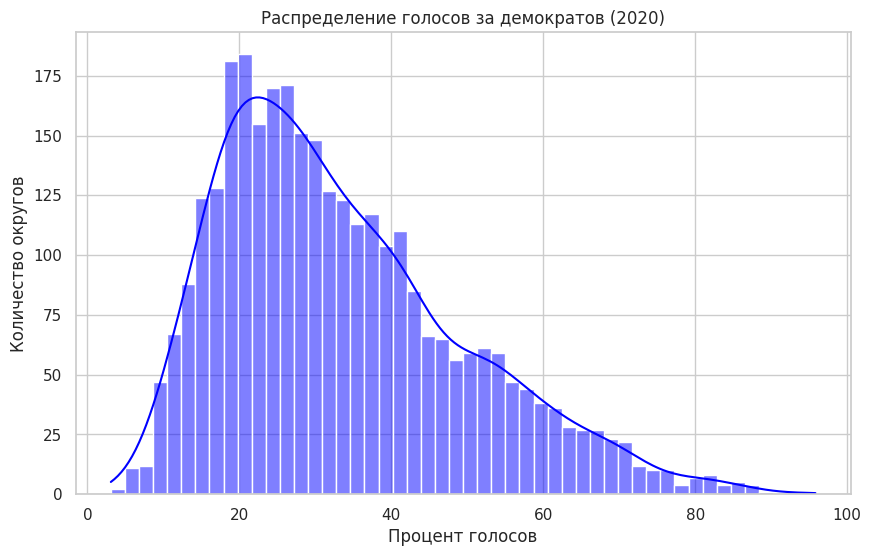

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# График распределения голосов за демократов
plt.figure(figsize=(10, 6))
sns.histplot(df['Democrat_Vote_Percentage'], bins=50, kde=True, color='blue')
plt.title('Распределение голосов за демократов (2020)')
plt.xlabel('Процент голосов')
plt.ylabel('Количество округов')
plt.show()

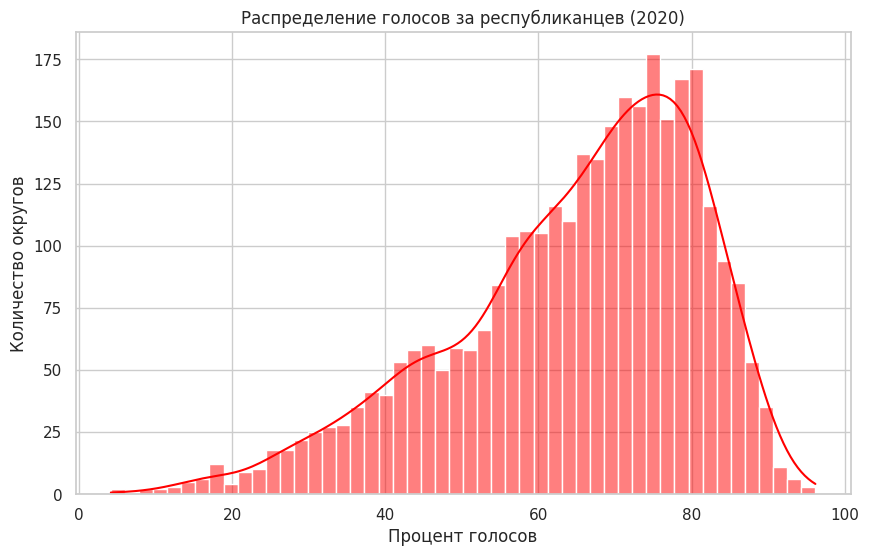

In [ ]:
# График распределения голосов за республиканцев
plt.figure(figsize=(10, 6))
sns.histplot(df['Republican_Vote_Percentage'], bins=50, kde=True, color='red')
plt.title('Распределение голосов за республиканцев (2020)')
plt.xlabel('Процент голосов')
plt.ylabel('Количество округов')
plt.show()

## **Матрица корреляции**

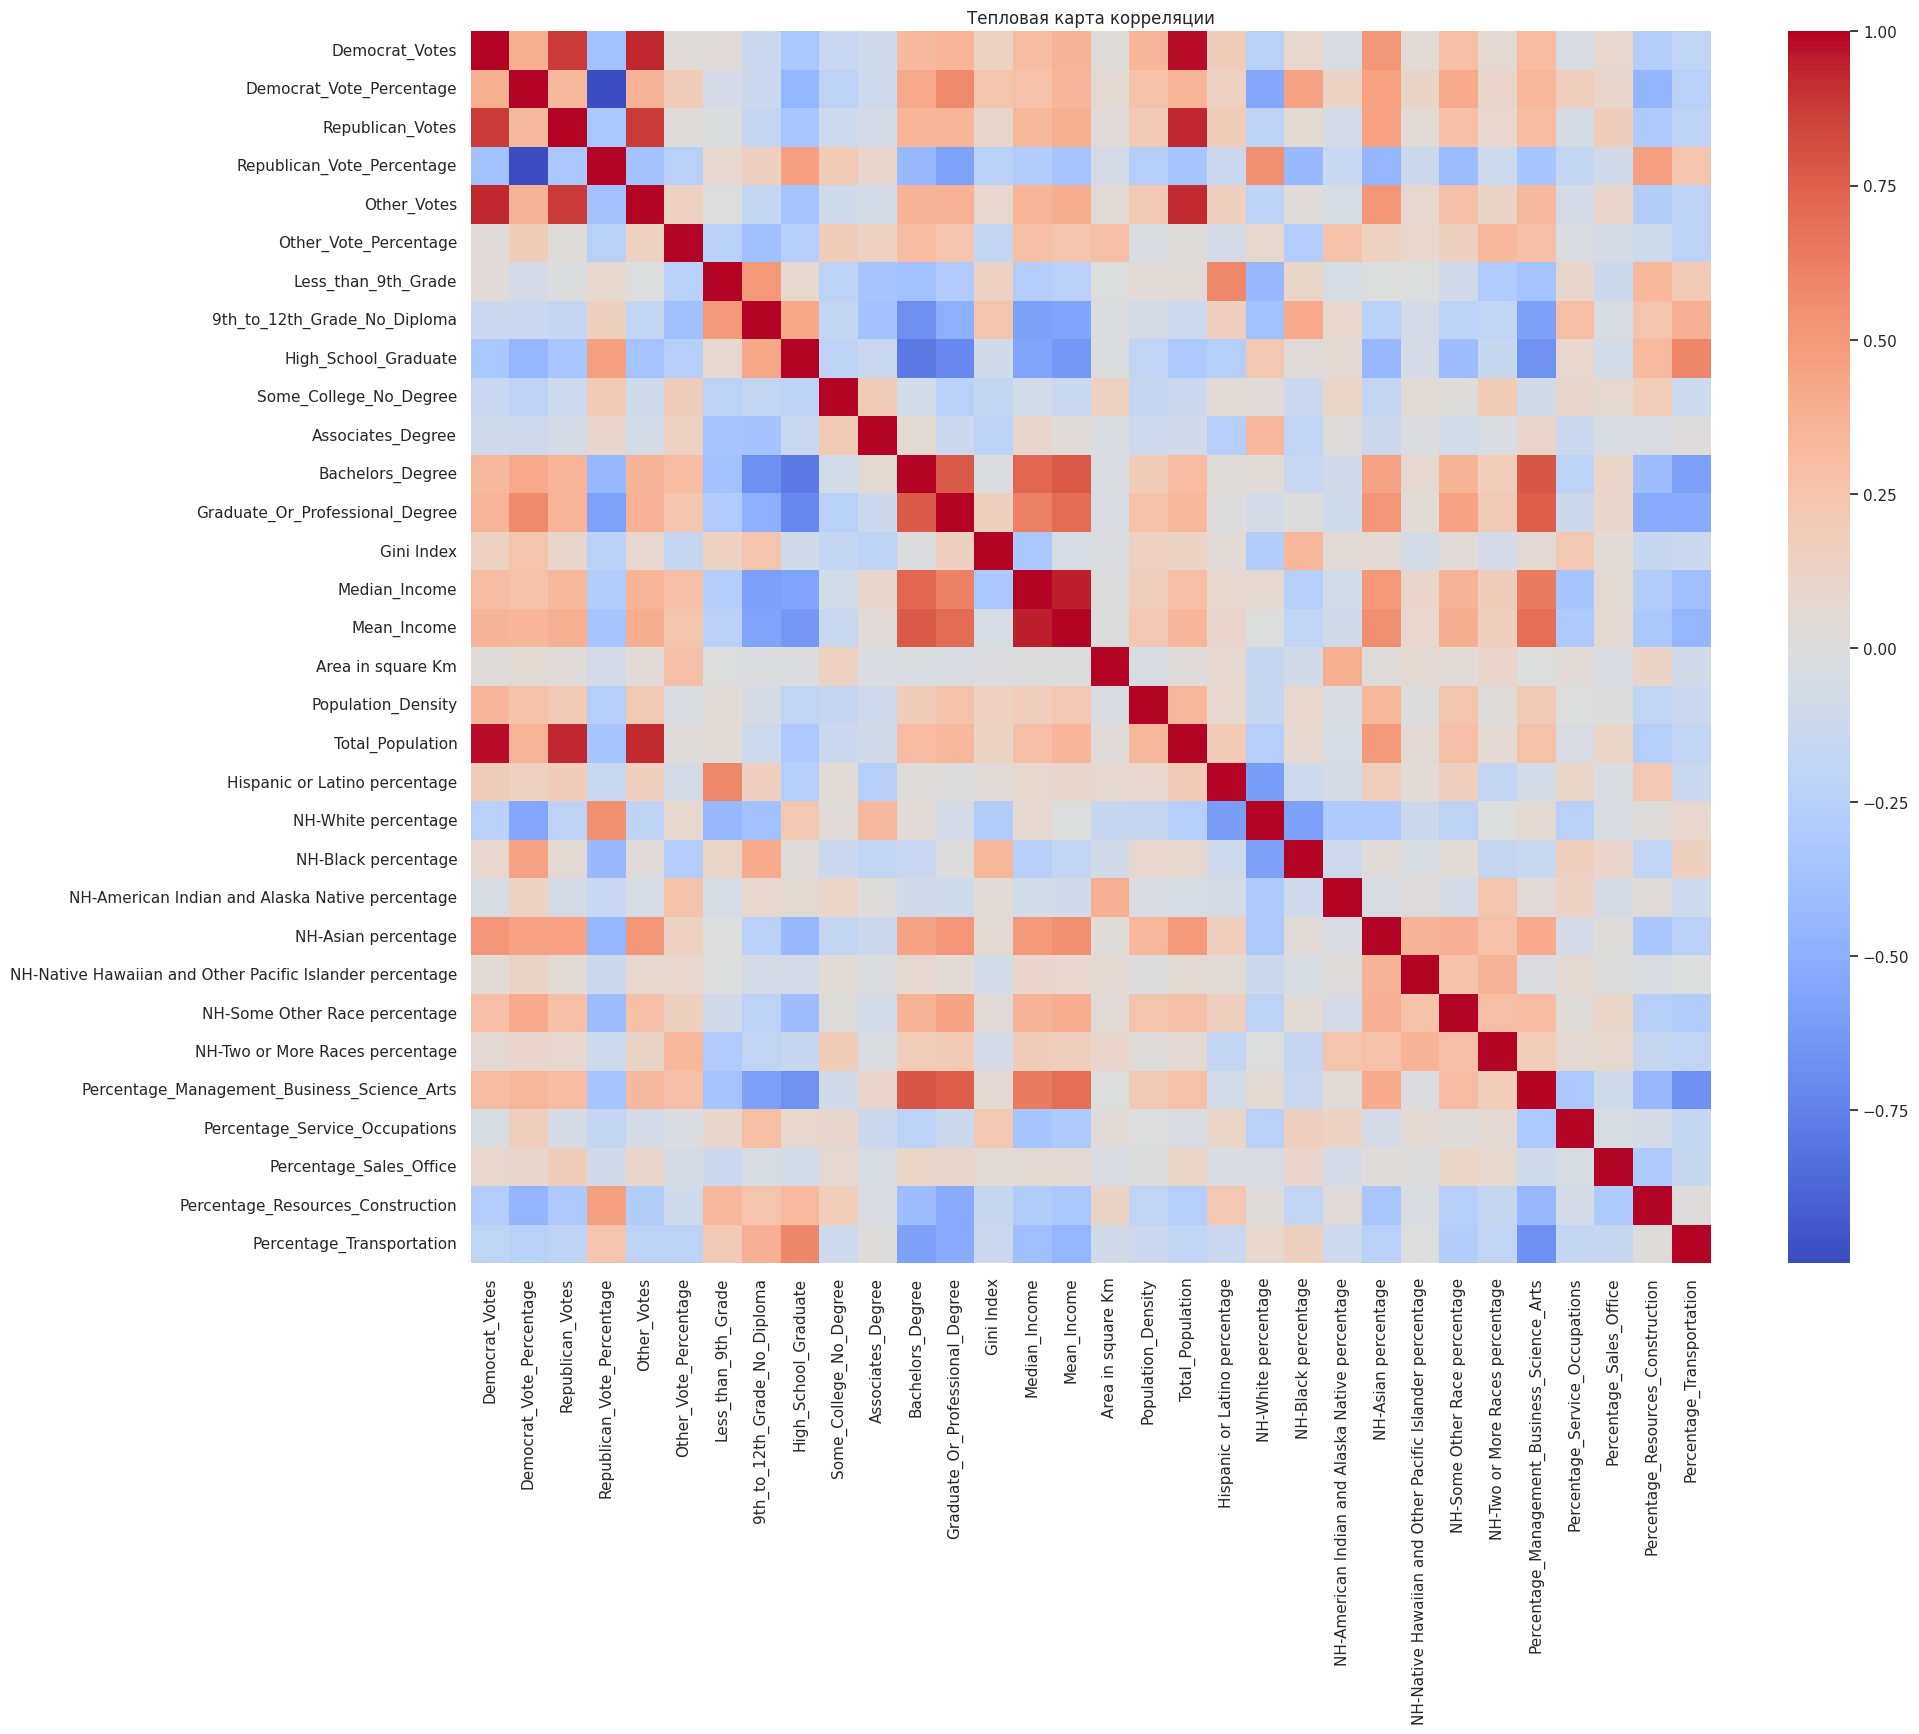

In [ ]:
# убираем столбцы с округом и штатом из корреляции
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

corr_matrix = df[numeric_cols].corr()

# тепловая карта
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции')
plt.show()

# **Объединение данных и создание новых признаков**

In [ ]:
# создание признака "Индекс образования" на основании данных
# чем выше уровень образования в округе - тем выше индекс

# создаем соотношение уровня образования с весом
education_weights = {
    'Less_than_9th_Grade': 1,
    '9th_to_12th_Grade_No_Diploma': 2,
    'High_School_Graduate': 3,
    'Some_College_No_Degree': 4,
    'Associates_Degree': 5,
    'Bachelors_Degree': 6,
    'Graduate_Or_Professional_Degree': 7
}

# рассчитываем индекс умножая процент людей с определенным уровнем образования на
# вес этого уровня образования и складываем с другими уровнями
df['Education_Index'] = (
    df['Less_than_9th_Grade'] * education_weights['Less_than_9th_Grade'] +
    df['9th_to_12th_Grade_No_Diploma'] * education_weights['9th_to_12th_Grade_No_Diploma'] +
    df['High_School_Graduate'] * education_weights['High_School_Graduate'] +
    df['Some_College_No_Degree'] * education_weights['Some_College_No_Degree'] +
    df['Associates_Degree'] * education_weights['Associates_Degree'] +
    df['Bachelors_Degree'] * education_weights['Bachelors_Degree'] +
    df['Graduate_Or_Professional_Degree'] * education_weights['Graduate_Or_Professional_Degree']
)

In [ ]:
# рассчитываем доход на душу населения в округе
df['Median_Income_per_Capita'] = df['Median_Income'] / df['Total_Population']
df['Mean_Income_per_Capita'] = df['Mean_Income'] / df['Total_Population']

In [ ]:
# создание признака "Индекс профессионального разнообразия" на основании данных
# чем равномернее распределены различные профессиональные направления - тем выше индекс

# функция для расчета индекса
# считаем сумму средних квадратичных отклонений и вычитаем из единицы
# чем больше какая-то проф. сфера преобладает, тем меньше итоговый индекс

occupational_directions = [
    'Percentage_Management_Business_Science_Arts',
    'Percentage_Service_Occupations',
    'Percentage_Sales_Office',
    'Percentage_Resources_Construction',
    'Percentage_Transportation'
]

def diversity_index(row):
    index = 1 - sum(row[direction] ** 2 for direction in occupational_directions)
    return index

# рассчет
df[occupational_directions] = df[occupational_directions] / 100

df['Occupational_Diversity_Index'] = df.apply(diversity_index, axis=1)

In [ ]:
# список незначащих признаков
columns_to_drop = [
    'county',
    'state',
    'Area in square Km'
]

df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [ ]:
# вывод после объединения данных и создания новых признаков
df

,Democrat_Votes,Democrat_Vote_Percentage,Republican_Votes,Republican_Vote_Percentage,Other_Votes,Other_Vote_Percentage,Less_than_9th_Grade,9th_to_12th_Grade_No_Diploma,High_School_Graduate,Some_College_No_Degree,...,Percentage_Sales_Office,Percentage_Resources_Construction,Percentage_Transportation,Democrat_Votes_per_Capita,Republican_Votes_per_Capita,Other_Votes_per_Capita,Education_Index,Median_Income_per_Capita,Mean_Income_per_Capita,Occupational_Diversity_Index
0,7503,27.02,19838,71.44,429,1.54,1.7,7.9,31.1,21.0,...,0.2202,0.0999,0.1736,0.127591,0.337352,0.007295,428.1,1.161721,1.536808,0.758694
1,24578,22.41,83544,76.17,1557,1.42,2.0,6.4,27.8,21.7,...,0.2420,0.0991,0.1313,0.106046,0.360465,0.006718,440.5,0.306510,0.414326,0.758119
2,4816,45.79,5622,53.45,80,0.76,7.3,16.2,36.8,19.9,...,0.1949,0.1253,0.2009,0.190937,0.222892,0.003172,345.9,1.574436,2.383856,0.788415
3,1986,20.70,7525,78.43,84,0.88,6.4,14.7,40.9,19.1,...,0.2057,0.1643,0.2547,0.089086,0.337550,0.003768,344.6,2.272866,2.921590,0.792978
4,2640,9.57,24711,89.57,237,0.86,7.1,11.1,35.3,20.7,...,0.2273,0.1581,0.2173,0.044644,0.417881,0.004008,366.5,0.971353,1.284439,0.787716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,3823,23.03,12229,73.66,551,3.32,2.4,4.6,32.7,25.8,...,0.1947,0.2034,0.1392,0.090438,0.289293,0.013035,413.5,1.877720,2.363952,0.782548
3139,9848,67.10,4341,29.58,488,3.32,2.4,1.7,16.7,16.7,...,0.1791,0.0581,0.0640,0.422099,0.186061,0.020916,517.4,4.640993,7.802923,0.691155
3140,1591,16.92,7496,79.73,315,3.35,2.1,3.5,36.3,27.4,...,0.2048,0.1738,0.1309,0.077800,0.366553,0.015403,405.3,3.822200,4.180782,0.781536
3141,651,16.23,3245,80.88,116,2.89,1.4,3.9,28.5,34.6,...,0.1843,0.1484,0.1492,0.084710,0.422251,0.015094,421.2,8.051399,9.693038,0.771570


# **Построение модели**

## **Подготовка данных к моделированию**

In [ ]:
# переименовываем столбцы с использованием нижнего подчеркивания вместо пробелов
df.rename(columns={
    'Gini Index': 'Gini_Index',
    'Hispanic or Latino percentage': 'Hispanic_or_Latino_percentage',
    'NH-White percentage': 'NH-White_percentage',
    'NH-Black percentage': 'NH-Black_percentage',
    'NH-Asian percentage': 'NH-Asian_percentage',
    'NH-American Indian and Alaska Native percentage': 'NH-American_Indian_and_Alaska_Native_percentage',
    'NH-Native Hawaiian and Other Pacific Islander percentage': 'NH-Native_Hawaiian_and_Other_Pacific_Islander_percentage',
    'NH-Some Other Race percentage': 'NH-Some_Other_Race_percentage',
    'NH-Two or More Races percentage': 'NH-Two_or_More_Races_percentage'
}, inplace=True)

# создание целевого признака для классификации
df['State_Status'] = (df['Democrat_Votes'] < df['Republican_Votes']).astype(int) #0 Демократы 1 Республиканцы

print("\nColumns after renaming:")
print(df.columns.tolist())


Columns after renaming:
['Democrat_Votes', 'Democrat_Vote_Percentage', 'Republican_Votes', 'Republican_Vote_Percentage', 'Other_Votes', 'Other_Vote_Percentage', 'Less_than_9th_Grade', '9th_to_12th_Grade_No_Diploma', 'High_School_Graduate', 'Some_College_No_Degree', 'Associates_Degree', 'Bachelors_Degree', 'Graduate_Or_Professional_Degree', 'Gini_Index', 'Median_Income', 'Mean_Income', 'Population_Density', 'Total_Population', 'Hispanic_or_Latino_percentage', 'NH-White_percentage', 'NH-Black_percentage', 'NH-American_Indian_and_Alaska_Native_percentage', 'NH-Asian_percentage', 'NH-Native_Hawaiian_and_Other_Pacific_Islander_percentage', 'NH-Some_Other_Race_percentage', 'NH-Two_or_More_Races_percentage', 'Percentage_Management_Business_Science_Arts', 'Percentage_Service_Occupations', 'Percentage_Sales_Office', 'Percentage_Resources_Construction', 'Percentage_Transportation', 'Democrat_Votes_per_Capita', 'Republican_Votes_per_Capita', 'Other_Votes_per_Capita', 'Education_Index', 'Median_I

## **Выбор признаков и целевой переменной**

In [ ]:
df['State_Status']

,State_Status
0,1
1,1
2,1
3,1
4,1
...,...
3138,1
3139,0
3140,1
3141,1


In [ ]:

undersampler = RandomUnderSampler(random_state=42)

# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop('State_Status', axis=1)  # Все столбцы, кроме State_Status
y = df['State_Status']  # Целевая переменная

# Применение андерсемплинга
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Создание нового DataFrame с результатами
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)


In [ ]:
df_resampled['State_Status'].value_counts()

,count
State_Status,
0,555
1,555


In [ ]:
# определение таргета
targets = ['State_Status']

# определение признаков
feature_columns = [
    'Gini_Index',
    'Median_Income',
    'Mean_Income',
    'Population_Density',
    'Total_Population',
    'Hispanic_or_Latino_percentage',
    'NH-White_percentage',
    'NH-Black_percentage',
    'NH-American_Indian_and_Alaska_Native_percentage',
    'NH-Asian_percentage',
    'NH-Native_Hawaiian_and_Other_Pacific_Islander_percentage',
    'NH-Some_Other_Race_percentage',
    'NH-Two_or_More_Races_percentage',
    'Education_Index',
    'Occupational_Diversity_Index'
    'Median_Income_per_Capita',
    'Mean_Income_per_Capita'
]

# проверка признаков на наличие в дф
missing_features = [col for col in feature_columns if col not in df_resampled.columns]
if missing_features:
    print(f"\nMissing features in the DataFrame: {missing_features}")
    print("Please ensure all feature columns are present and correctly named.")
    # Optionally, remove missing features from the list
    feature_columns = [col for col in feature_columns if col in df_resampled.columns]
    print(f"Adjusted feature_columns: {feature_columns}")
else:
    print("\nAll feature columns are present.")

X = df_resampled[feature_columns]
y = df_resampled[targets]


Missing features in the DataFrame: ['Occupational_Diversity_IndexMedian_Income_per_Capita']
Please ensure all feature columns are present and correctly named.
Adjusted feature_columns: ['Gini_Index', 'Median_Income', 'Mean_Income', 'Population_Density', 'Total_Population', 'Hispanic_or_Latino_percentage', 'NH-White_percentage', 'NH-Black_percentage', 'NH-American_Indian_and_Alaska_Native_percentage', 'NH-Asian_percentage', 'NH-Native_Hawaiian_and_Other_Pacific_Islander_percentage', 'NH-Some_Other_Race_percentage', 'NH-Two_or_More_Races_percentage', 'Education_Index', 'Mean_Income_per_Capita']


## **Разделение данных**

In [ ]:
# разделяем данные (80% тренировочные, 20% тестовые)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Targets Shape: {y_train.shape}")
print(f"Testing Targets Shape: {y_test.shape}")


Training Features Shape: (888, 15)
Testing Features Shape: (222, 15)
Training Targets Shape: (888, 1)
Testing Targets Shape: (222, 1)


## **Normalizing the Features**

In [ ]:
# создание скейлера
scaler = StandardScaler()

# применяем скейлер на обоих наборах
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns)

## **Построение нейросетевой модели с помощью Scikit-learn**

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
models.append(("RFC", RandomForestClassifier()))

In [ ]:
import warnings

# отключение предупреждений
warnings.filterwarnings("ignore")

results = {}

# обучение и тестирование моделей
for name, model in models:
    # обучение модели
    model.fit(X_train_scaled, y_train)
    # предсказания
    y_pred = model.predict(X_test_scaled)
    # оценка метрики

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = [accuracy, precision, recall, f1]

    print(f"{name}: Accuracy = {accuracy:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f}, F1 = {f1:.2f}\n")


LR: Accuracy = 0.88, Precision = 0.85, Recall = 0.88, F1 = 0.87

LDA: Accuracy = 0.88, Precision = 0.87, Recall = 0.87, F1 = 0.87

KNN: Accuracy = 0.91, Precision = 0.87, Recall = 0.93, F1 = 0.90

CART: Accuracy = 0.85, Precision = 0.84, Recall = 0.81, F1 = 0.83

NB: Accuracy = 0.74, Precision = 0.64, Recall = 0.96, F1 = 0.77

SVC: Accuracy = 0.90, Precision = 0.86, Recall = 0.93, F1 = 0.89

RFC: Accuracy = 0.91, Precision = 0.92, Recall = 0.88, F1 = 0.90



In [ ]:

# определение параметров для подбора
param_grid = {
    'n_estimators': [25, 50],          # Количество деревьев
    'max_depth': [10, 20, 30],         # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],         # Минимальное число образцов для разделения
    'min_samples_leaf': [1, 2, 4],           # Минимальное число листьев в узле
    'bootstrap': [True, False]               # Использовать бутстреп или нет
}

# создание модели
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# обучение
grid_search.fit(X_train_scaled, y_train)

# лучшие параметры
best_params = grid_search.best_params_
print(f"Лучшие параметры: {best_params}")

# лучшая модель
best_rf = grid_search.best_estimator_

# предсказания на тестовой выборке
y_pred = best_rf.predict(X_test_scaled)

# оценка метрик
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.8829

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       122
           1       0.88      0.86      0.87       100

    accuracy                           0.88       222
   macro avg       0.88      0.88      0.88       222
weighted avg       0.88      0.88      0.88       222



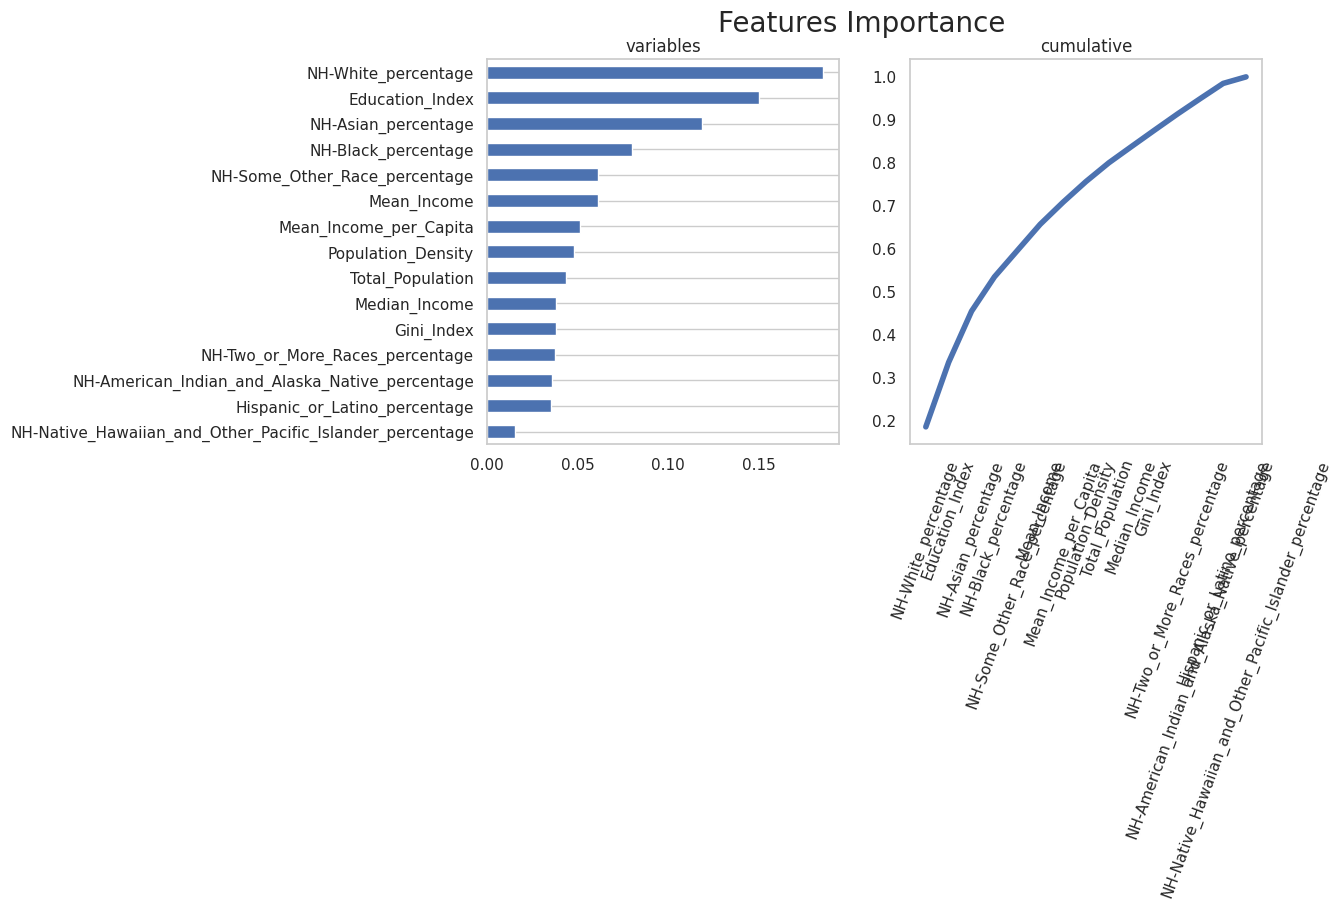

In [ ]:
model = RandomForestClassifier(bootstrap=True, n_estimators=50, random_state=42, max_depth=10, min_samples_leaf=1)
model.fit(X,y)

importances = model.feature_importances_ #это оценка, присваиваемая функциям модели машинного обучения,которая определяет, насколько «важной» является функция для прогноза модели.
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE":feature_columns}).sort_values("IMPORTANCE",ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,figsize=(10,5),dpi=100)# распаковываем  кортеж в переменные figи ax.
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')# подпишем график
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')# подпишем график
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4,
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)),
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')#Настроим линии сетки.

plt.show()

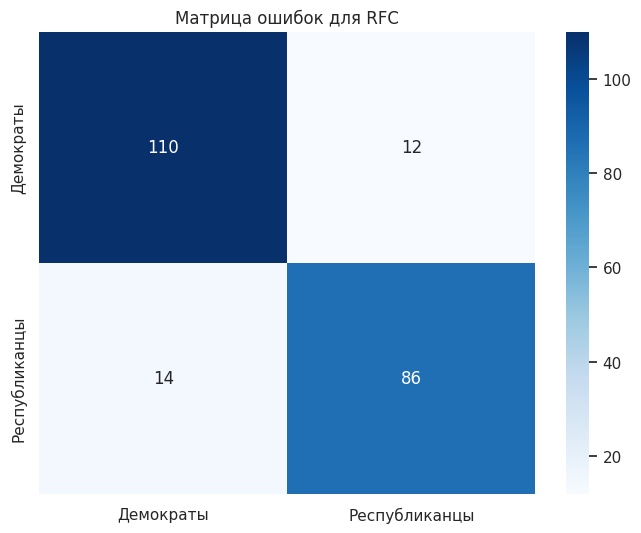

In [ ]:
# построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Демократы', 'Республиканцы'], yticklabels=['Демократы', 'Республиканцы'])
plt.title(f'Матрица ошибок для {name}')
plt.show()

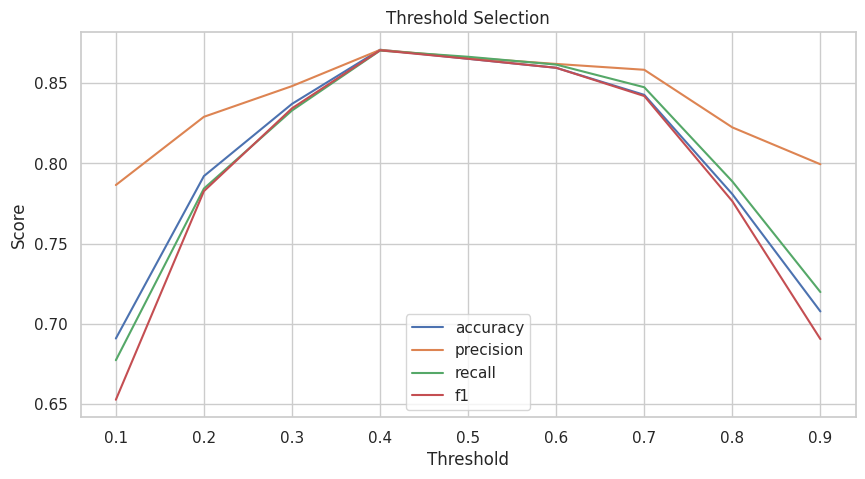

In [ ]:

# Обучение и разделение данных
XX_train, XX_test, yy_train, yy_test = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Создание модели RandomForestClassifier
model = RandomForestClassifier(bootstrap=True, n_estimators=50, random_state=42, max_depth=10, min_samples_leaf=1)
predicted_prob = model.fit(XX_train, yy_train).predict_proba(XX_test)[:, 1]

# Словарь для метрик
dic_scores = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
thresholds = []

# Вычисление метрик для различных порогов
for threshold in np.arange(0.1, 1, step=0.1):
    predicted = (predicted_prob > threshold)
    thresholds.append(threshold)
    dic_scores["accuracy"].append(accuracy_score(yy_test, predicted))
    dic_scores["precision"].append(precision_score(yy_test, predicted, average='macro', zero_division=1))
    dic_scores["recall"].append(recall_score(yy_test, predicted, average='macro'))
    dic_scores["f1"].append(f1_score(yy_test, predicted, average='macro'))

# Построение графика
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), dpi=100)
dtf_scores = pd.DataFrame(dic_scores).set_index(pd.Index(thresholds))
ax.set(xlabel='Threshold', ylabel="Score", title="Threshold Selection")
dtf_scores.plot(ax=ax)

plt.show()
